In [1]:
# install a few libraries

!pip install -q -r requirements.txt

In [2]:
# import a few libraries 

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# simulate a stock closing price over a 5-year span 

mu = 0.001
sigma = 0.01
start_price = 100
duration = 365*5 + 2
np.random.seed(0)

returns = np.random.normal(loc=mu, scale=sigma, size=duration)
price = np.round(start_price*(1+returns).cumprod(), 2)

In [4]:
# convert stock closing price from numpy array to dataframe 

df = pd.DataFrame(price, columns = ['Close'])

In [5]:
# verify the number of records in the dataframe 

df.count()

Close    1827
dtype: int64

In [6]:
# create index using date

date_index = pd.date_range(start='1/1/2016', end='12/31/2020')

In [7]:
# verify the number of records in the index

number_of_days = (date_index[-1] - date_index[0]).days + 1
number_of_days

1827

In [8]:
# reset index in the dataframe for stock closing price

df.index = date_index
df.head()

,Close
2016-01-01,101.86
2016-01-02,102.37
2016-01-03,103.48
2016-01-04,105.90
2016-01-05,107.98


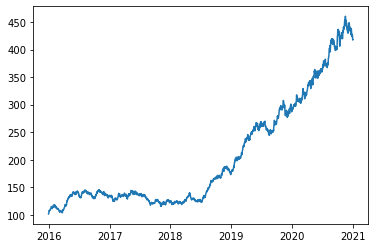

In [9]:
# take a look at the simulated stock closing price over time

plt.plot(df)
plt.show()

In [10]:
# move index into a column in dataframe, and rename to Date 

df = df.reset_index()
df = df.rename(columns={"index": "Date"})
df.head()

,Date,Close
0,2016-01-01,101.86
1,2016-01-02,102.37
2,2016-01-03,103.48
3,2016-01-04,105.90
4,2016-01-05,107.98


In [11]:
# Create a variable to denote day of week

df["DayOfWeek"] = df["Date"].dt.weekday
df.head()

,Date,Close,DayOfWeek
0,2016-01-01,101.86,4
1,2016-01-02,102.37,5
2,2016-01-03,103.48,6
3,2016-01-04,105.90,0
4,2016-01-05,107.98,1


In [12]:
# pick out weekends where stock is not traded, and carry forward last closing price

df['Close'] = df['Close'].where(df['DayOfWeek'] <= 4 ).fillna(method='ffill')
df = df.drop(['DayOfWeek'], axis = 1)
df.head(10)

,Date,Close
0,2016-01-01,101.86
1,2016-01-02,101.86
2,2016-01-03,101.86
3,2016-01-04,105.90
4,2016-01-05,107.98
5,2016-01-06,107.04
6,2016-01-07,108.16
7,2016-01-08,108.10
8,2016-01-09,108.10
9,2016-01-10,108.10


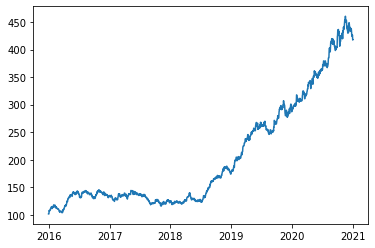

In [13]:
# take a look at the simulated stock closing price, with imputed values for the weekends

plt.plot(df['Date'], df['Close'])
plt.show()

In [14]:
# create a column in the dataframe to denote the symbol of the simulated stock 

df['Item_Id'] = 'XXYZ'
df = df[['Item_Id', 'Date', 'Close']]
df.head()

,Item_Id,Date,Close
0,XXYZ,2016-01-01,101.86
1,XXYZ,2016-01-02,101.86
2,XXYZ,2016-01-03,101.86
3,XXYZ,2016-01-04,105.90
4,XXYZ,2016-01-05,107.98


In [15]:
# check whether any column has missing value

df.isnull().sum()

Item_Id    0
Date       0
Close      0
dtype: int64

In [16]:
# save simulated dataset to csv file for model training

df.to_csv('daily_close_price.csv', index=False)

In [17]:
# once again validate format and wrap up

!head daily_close_price.csv -n 5

Item_Id,Date,Close
XXYZ,2016-01-01,101.86
XXYZ,2016-01-02,101.86
XXYZ,2016-01-03,101.86
XXYZ,2016-01-04,105.9
